In [1]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz-10.0.1-win64/bin/'

import sys
sys.path.append('../algorithms/')

from CSOWP_SR import *
from ExpressionTree import *
import utils

import pandas as pd
import numpy as np
import pickle
import re
import sympy as smp
import edist.ted as ted

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import itertools

In [2]:
data = utils.create_all_data("Cluster_outputs")
data

Cluster_outputs/differential_evolution


In [2]:
funcs_dict = {
    "F1_specific": "lambda x: 1.57 + 24.3*x", "F4_specific": "lambda x: -2.3 + 0.13*np.sin(x)", 
    "F5_specific": "lambda x: 3 + 2.13*np.log(x)", "F6_specific": "lambda x: 1.3 + 0.13*np.sqrt(x)",
    "F7_specific": "lambda x: 213.809408*(1-np.exp(-0.547237*x))", 
    "F11_specific": "lambda x: 6.87 + 11*np.cos(7.23*x**3)",
    "F1": "lambda x: 1.57 + 24.3*x", "F4": "lambda x: -2.3 + 0.13*np.sin(x)", 
    "F5": "lambda x: 3 + 2.13*np.log(x)", "F6": "lambda x: 1.3 + 0.13*np.sqrt(x)",
    "F7": "lambda x: 213.809408*(1-np.exp(-0.547237*x))", 
    "F11": "lambda x: 6.87 + 11*np.cos(7.23*x**3)",
    "logistic_specific": "lambda x: 10*np.exp(-0.5*np.exp(-0.5*x + 2))",
    "logistic": "lambda x: 10*np.exp(-0.5*np.exp(-0.5*x + 2))",
    "logistic_noTanh": "lambda x: 10*np.exp(-0.5*np.exp(-0.5*x + 2))",
    "projectile_motion_specific": "lambda x: 6*x -9.8*x**2",
    "projectile_motion": "lambda x: 6*x -9.8*x**2",
    "damped_pendulum_specific": "lambda x: np.exp(-x/10)*(3*np.cos(2*x))",
    "damped_pendulum": "lambda x: np.exp(-x/10)*(3*np.cos(2*x))",
    "radioactive_decay_specific": "lambda x: 10*np.exp(-0.5*x)", 
    "radioactive_decay": "lambda x: 10*np.exp(-0.5*x)"
    }

expected_data = pd.DataFrame(columns=["nodes", "adj", "problem", "expected_string"])
expected_data

symbols = {"x": smp.symbols("x", positive=True, real=True)}

for name, function in funcs_dict.items():
    function = function[10:]
    function = smp.parse_expr(function.replace("np.", ""), local_dict=symbols).simplify()
    tree = utils.exprToTree(function, single_name=True)
    node, adj = tree.parentChildRepr().values()
    df = pd.DataFrame([{"nodes": node, "adj": adj, "problem": name, "expected_string": function,
                          "expected_tree": tree}])
    expected_data = pd.concat([expected_data, df])

expected_data.set_index("problem", drop=True, inplace=True)
expected_data

,nodes,adj,expected_string,expected_tree
problem,,,,
F1_specific,"[+, C, *, C, x]","[[1, 2], [], [3, 4], [], []]",24.3*x + 1.57,"(+, C, *, C, x)"
F4_specific,"[+, C, *, C, sin, x]","[[1, 2], [], [3, 4], [], [5], []]",0.13*sin(x) - 2.3,"(+, C, *, C, sin, x)"
F5_specific,"[+, C, *, C, log, x]","[[1, 2], [], [3, 4], [], [5], []]",2.13*log(x) + 3,"(+, C, *, C, log, x)"
F6_specific,"[+, C, *, C, **, x, C]","[[1, 2], [], [3, 4], [], [5, 6], [], []]",0.13*sqrt(x) + 1.3,"(+, C, *, C, **, x, C)"
F7_specific,"[+, C, *, C, exp, *, C, x]","[[1, 2], [], [3, 4], [], [5], [6, 7], [], []]",213.809408 - 213.809408*exp(-0.547237*x),"(+, C, *, C, exp, *, C, x)"
F11_specific,"[+, C, *, C, cos, *, C, **, x, C]","[[1, 2], [], [3, 4], [], [5], [6, 7], [], [8, ...",11.0*cos(7.23*x**3) + 6.87,"(+, C, *, C, cos, *, C, **, x, C)"
F1,"[+, C, *, C, x]","[[1, 2], [], [3, 4], [], []]",24.3*x + 1.57,"(+, C, *, C, x)"
F4,"[+, C, *, C, sin, x]","[[1, 2], [], [3, 4], [], [5], []]",0.13*sin(x) - 2.3,"(+, C, *, C, sin, x)"
F5,"[+, C, *, C, log, x]","[[1, 2], [], [3, 4], [], [5], []]",2.13*log(x) + 3,"(+, C, *, C, log, x)"


In [4]:
with open("article_data.pickle", "wb") as file:
    pickle.dump(data, file)

with open("expected_data.pickle", "wb") as file:
    pickle.dump(expected_data, file)

In [3]:
with open("ted_data.pickle", "rb") as file:
    ted_data = pickle.load(file)

with open("ted_data_original.pickle", "rb") as file:
    ted_data_original = pickle.load(file)

In [4]:
def print_full(df, lines=100):
    pd.set_option('display.max_rows', lines)
    display(df.head(lines))
    pd.reset_option('display.max_rows')

In [6]:
index = 51
o_expr = expected_data.loc[ted_data.iloc[index].problem].expected_string
expr = ted_data.iloc[index].solution_string

display(o_expr)
display(expr.simplify())

x*(6 - 9.8*x)

x*(6.0 - 9.8*x)

In [14]:
for index, row in ted_data.iterrows():
    solution = row.solution_string.simplify()

KeyboardInterrupt: 

In [7]:
print_full(ted_data, 10)

,nodes,adj,optimization,problem,index,MSE,training_time(s),solution_string,expression,TED
0,"[*, C, tan, cos, *, C, x]","[[1, 2], [], [3], [4], [5, 6], [], []]",differential_evolution,damped_pendulum,0,6.107459e-01,5452.419298,1.93050193050193*tan(cos(2*x)),e^{-x/10}*3cos(2x),20.0
1,"[+, *, C, sin, +, C, *, C, x, cos, +, C, *, C, x]","[[1, 9], [2, 3], [], [4], [5, 6], [], [7, 8], ...",differential_evolution,damped_pendulum,1,1.424096e+00,2568.315022,-sin(2*x - 1) + cos(1905627*x/967709 - 212926/...,e^{-x/10}*3cos(2x),30.0
2,"[*, C, cos, +, C, *, C, x]","[[1, 2], [], [3], [4, 5], [], [6, 7], [], []]",differential_evolution,damped_pendulum,2,4.611947e-01,2379.969260,3.13907167377595*cos(1113847*x/557120 + 627041...,e^{-x/10}*3cos(2x),22.0
3,"[+, C, *, C, cos, cos, x]","[[1, 2], [], [3, 4], [], [5], [6], []]",differential_evolution,damped_pendulum_specific,0,4.617531e-01,4258.475051,10.3990689774009 - 13.6097751482811*cos(cos(x)),e^{-x/10}*3cos(2x),26.0
4,"[*, C, cos, *, C, x]","[[1, 2], [], [3], [4, 5], [], []]",differential_evolution,damped_pendulum_specific,1,5.540477e-01,2570.202753,2.71828182845856*cos(2*x),e^{-x/10}*3cos(2x),20.0
5,"[*, C, cos, *, C, x]","[[1, 2], [], [3], [4, 5], [], []]",differential_evolution,damped_pendulum_specific,2,4.615806e-01,2187.671899,3.13875864625512*cos(2*x),e^{-x/10}*3cos(2x),20.0
6,"[+, C, *, C, x]","[[1, 2], [], [3, 4], [], []]",differential_evolution,F1,0,2.388628e-29,5438.954849,24.3*x + 1.57,1.57 + 24.3x,0.0
7,"[+, C, *, C, x]","[[1, 2], [], [3, 4], [], []]",differential_evolution,F1,1,1.417464e-29,5647.433049,24.3*x + 1.57,1.57 + 24.3x,0.0
8,"[+, C, *, C, x]","[[1, 2], [], [3, 4], [], []]",differential_evolution,F1,2,2.047873e-29,5489.641307,24.3*x + 1.57,1.57 + 24.3x,0.0
9,"[*, C, exp, *, C, exp, tanh, *, C, **, x, C]","[[1, 2], [], [3], [4, 5], [], [6], [7], [8, 9]...",differential_evolution,F11,0,5.372428e+01,5085.187373,37.0820605611956*exp(-467685*exp(tanh(2500267*...,6.87 + 11cos(7.23x^3),14.0


In [7]:
expected_data.loc["projectile_motion"].expected_string.simplify()

x*(6.0 - 9.8*x)

In [8]:
pm_data = ted_data[ted_data["problem"] == "projectile_motion"]
smp.parse_expr(pm_data.iloc[2].solution_string).simplify()

-9.8000000000000002*x**2 + 6.0000000000000004*x - 7.992304734694145e-15

In [9]:
help(smp.nsimplify)

Help on function nsimplify in module sympy.simplify.simplify:

nsimplify(expr, constants=(), tolerance=None, full=False, rational=None, rational_conversion='base10')
    Find a simple representation for a number or, if there are free symbols or
    if ``rational=True``, then replace Floats with their Rational equivalents. If
    no change is made and rational is not False then Floats will at least be
    converted to Rationals.
    
    Explanation
    
    For numerical expressions, a simple formula that numerically matches the
    given numerical expression is sought (and the input should be possible
    to evalf to a precision of at least 30 digits).
    
    Optionally, a list of (rationally independent) constants to
    include in the formula may be given.
    
    A lower tolerance may be set to find less exact matches. If no tolerance
    is given then the least precise value will set the tolerance (e.g. Floats
    default to 15 digits of precision, so would be tolerance=10**-15

In [21]:
x = smp.symbols("x", positive=True, real=True)

symbols = {"x": x}

string = pm_data.loc[51].solution_string

expr = smp.parse_expr(string, local_dict=symbols).simplify()
expr = 5.2
# expr = smp.parse_expr(string).simplify()

expr = smp.nsimplify(expr, tolerance=1e-6).evalf()
expr

5.20000000000000

In [19]:
utils.exprToTree(expr)

In [180]:
ted_data[ted_data["problem"] == "projectile_motion"]

,nodes,adj,optimization,problem,index,MSE,training_time(s),solution_string,expression,TED,expected_nodes
51,"[*, +, C, *, C, x, +, 4.2074956641569053e-15, ...","[[1, 6], [2, 3], [], [4, 5], [], [], [7, 8], [...",differential_evolution,projectile_motion,0,1.395630e-28,5859.910628,(((0.612244897959184-x)*0.646476343042572)*((2...,6x - 9.8x^2,7,"[+, *, C, x, *, C, **, x, C]"
52,"[*, C, *, x, +, C, *, C, x]","[[1, 2], [], [3, 4], [], [5, 6], [], [7, 8], [...",differential_evolution,projectile_motion,1,1.297756e-28,3587.192779,((x/0.27869053835713387)*((0.9813967071537245-...,6x - 9.8x^2,7,"[+, *, C, x, *, C, **, x, C]"
53,"[+, -7.9923047346941450e-15, +, *, C, x, *, C,...","[[1, 2], [], [3, 6], [4, 5], [], [], [7, 8], [...",differential_evolution,projectile_motion,2,1.398487e-28,3110.136322,(((((0.006363747767029193-0.006363747767030525...,6x - 9.8x^2,2,"[+, *, C, x, *, C, **, x, C]"
114,"[*, C, *, x, +, C, *, C, x]","[[1, 2], [], [3, 4], [], [5, 6], [], [7, 8], [...",dual_annealing,projectile_motion,0,1.399953e-12,6652.517509,(((((0.7653815867880264-0.15313664755229403)-x...,6x - 9.8x^2,7,"[+, *, C, x, *, C, **, x, C]"
115,"[*, C, *, x, +, C, *, C, x]","[[1, 2], [], [3, 4], [], [5, 6], [], [7, 8], [...",dual_annealing,projectile_motion,1,1.800397e-13,5599.458201,((((x+x)*(0.6122448847209246-x))/0.68818259778...,6x - 9.8x^2,7,"[+, *, C, x, *, C, **, x, C]"
116,"[*, C, *, x, +, C, *, C, x]","[[1, 2], [], [3, 4], [], [5, 6], [], [7, 8], [...",dual_annealing,projectile_motion,2,1.087994e-12,2984.641439,((x/0.25581561725109614)/(sqrt(0.1591086317928...,6x - 9.8x^2,7,"[+, *, C, x, *, C, **, x, C]"
177,"[+, *, C, x, *, C, **, x, C]","[[1, 4], [2, 3], [], [], [5, 6], [], [7, 8], [...",LS,projectile_motion,0,0.000000e+00,5083.221732,((6.0*x)-(9.8*(x)**2)),6x - 9.8x^2,0,"[+, *, C, x, *, C, **, x, C]"
178,"[*, x, +, C, *, C, x]","[[1, 2], [], [3, 4], [], [5, 6], [], []]",LS,projectile_motion,1,1.487421e-28,2837.091728,(x*((5.2371925987087895-sin(-2.273948969849079...,6x - 9.8x^2,6,"[+, *, C, x, *, C, **, x, C]"
179,"[*, x, +, C, *, C, x]","[[1, 2], [], [3, 4], [], [5, 6], [], []]",LS,projectile_motion,2,1.290095e-28,2442.652564,((sin(0.6935299950758559)-((9.8*x)+(1.12159238...,6x - 9.8x^2,6,"[+, *, C, x, *, C, **, x, C]"
240,"[*, C, *, x, +, C, *, C, x]","[[1, 2], [], [3, 4], [], [5, 6], [], [7, 8], [...",NoOpt,projectile_motion,0,2.663256e+02,4969.060954,((x*(0.987-x))/tanh(0.094)),6x - 9.8x^2,7,"[+, *, C, x, *, C, **, x, C]"


In [7]:
expected = {}

for index, row in ted_data.iterrows():
    problem = row.problem
    expected[index] = expected_data.loc[problem].nodes

expected_dict = {"expected_nodes": expected}

expected_df = pd.DataFrame(expected_dict, index=expected.keys())
ted_data = pd.concat([ted_data, expected_df], axis=1)

In [8]:
ted_data1 = ted_data[ted_data["index"] == 0]
ted_data2 = ted_data[ted_data["index"] == 1]
ted_data3 = ted_data[ted_data["index"] == 2]

# Graphs

## MSE

In [9]:
problems = ted_data1["problem"].unique()
problems

array(['damped_pendulum', 'damped_pendulum_specific', 'F1', 'F11',
       'F11_specific', 'F1_specific', 'F4', 'F4_specific', 'F5',
       'F5_specific', 'F6', 'F6_specific', 'F7', 'F7_specific',
       'logistic', 'logistic_noTanh', 'logistic_specific',
       'projectile_motion', 'projectile_motion_specific',
       'radioactive_decay', 'radioactive_decay_specific'], dtype=object)

<Axes: xlabel='MSE', ylabel='optimization'>

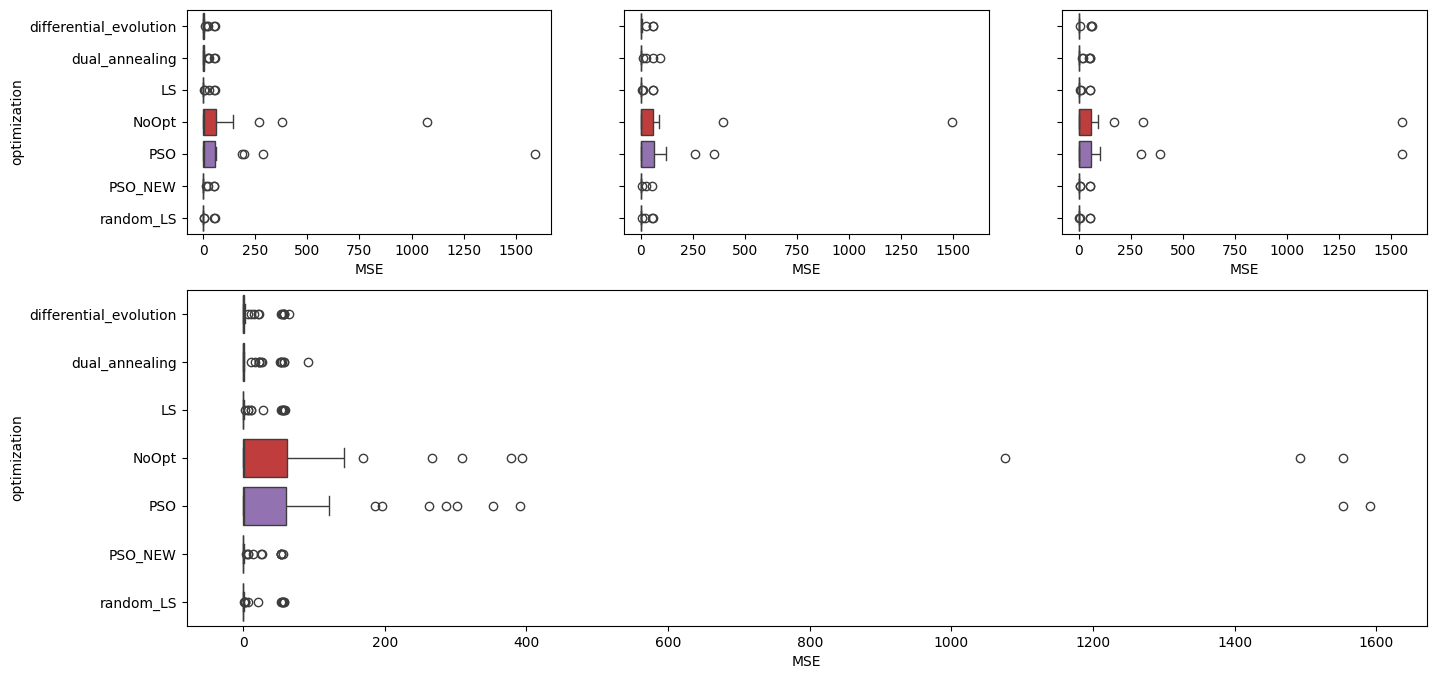

In [10]:
fig = plt.figure(figsize=(16, 8))
gs = mpl.gridspec.GridSpec(2, 3, height_ratios=[1, 1.5])

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1], sharex=ax1)
ax3 = fig.add_subplot(gs[0,2], sharex=ax2)
ax4 = fig.add_subplot(gs[1, :])

axs = [ax1, ax2, ax3, ax4]
ted_datas = [ted_data1, ted_data2, ted_data3]

for i in range(3):
    sns.boxplot(ted_datas[i], x="MSE", y="optimization", hue="optimization", ax=axs[i])
    if i>0:
        axs[i].set_yticklabels("")
        axs[i].set_ylabel("")

sns.boxplot(ted_data, x="MSE", y="optimization", hue="optimization", ax=axs[3])

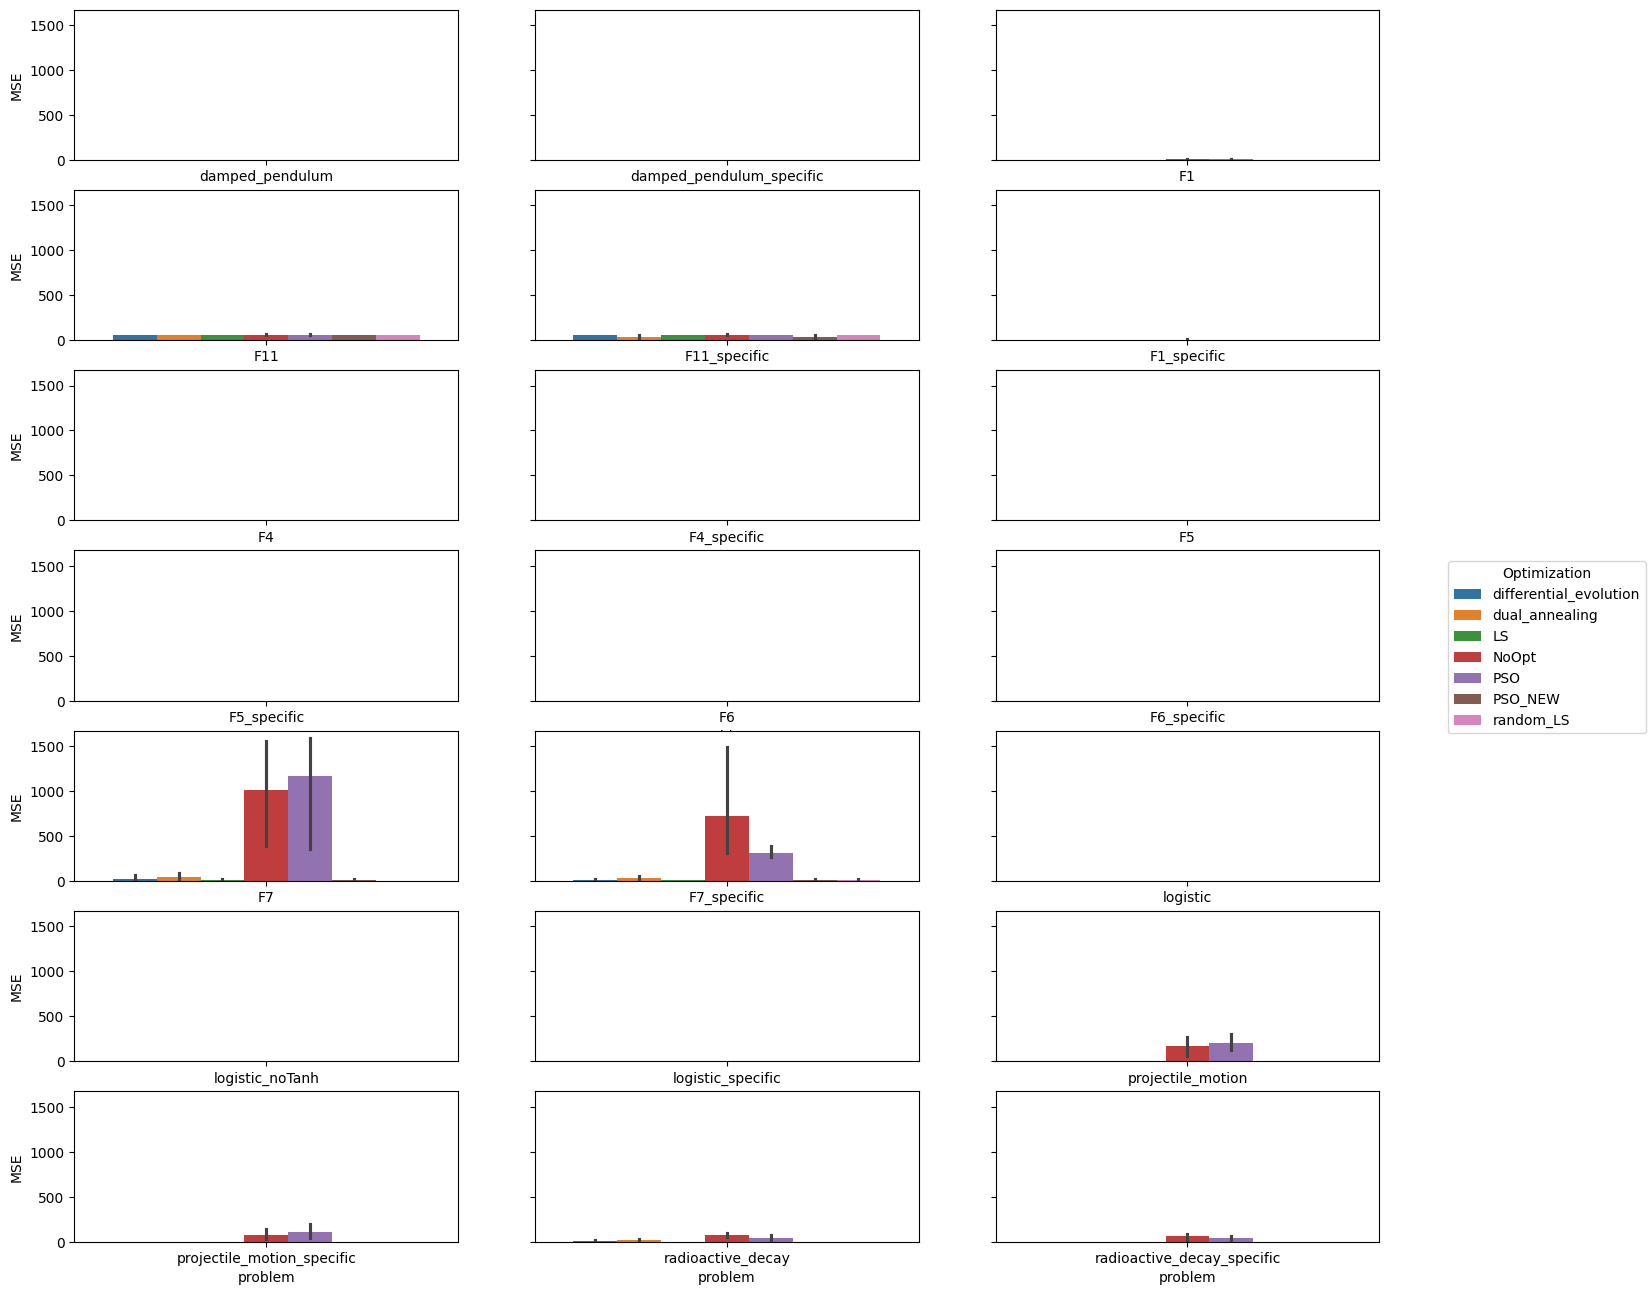

In [11]:
fig, axs = plt.subplots(7, 3, figsize=(18, 16), sharey=True)
axs = axs.flatten()

for ax, problem in zip(axs, problems):
    filt_data = ted_data[ted_data["problem"] == problem]
    sns.barplot(data=filt_data, x="problem", y="MSE", hue="optimization", ax=ax)
    ax.get_legend().remove()

# Get the handles and labels from the last plot for the legend
handles, labels = axs[-1].get_legend_handles_labels()

# Add the legend to the figure, positioned on the right
fig.legend(handles, labels, loc='center right', title='Optimization')

# Adjust layout to make space for the legend
plt.subplots_adjust(right=0.85)

plt.show()

## MSE (No Outlier)

In [12]:
problems = ted_data1["problem"].unique()
problems

array(['damped_pendulum', 'damped_pendulum_specific', 'F1', 'F11',
       'F11_specific', 'F1_specific', 'F4', 'F4_specific', 'F5',
       'F5_specific', 'F6', 'F6_specific', 'F7', 'F7_specific',
       'logistic', 'logistic_noTanh', 'logistic_specific',
       'projectile_motion', 'projectile_motion_specific',
       'radioactive_decay', 'radioactive_decay_specific'], dtype=object)

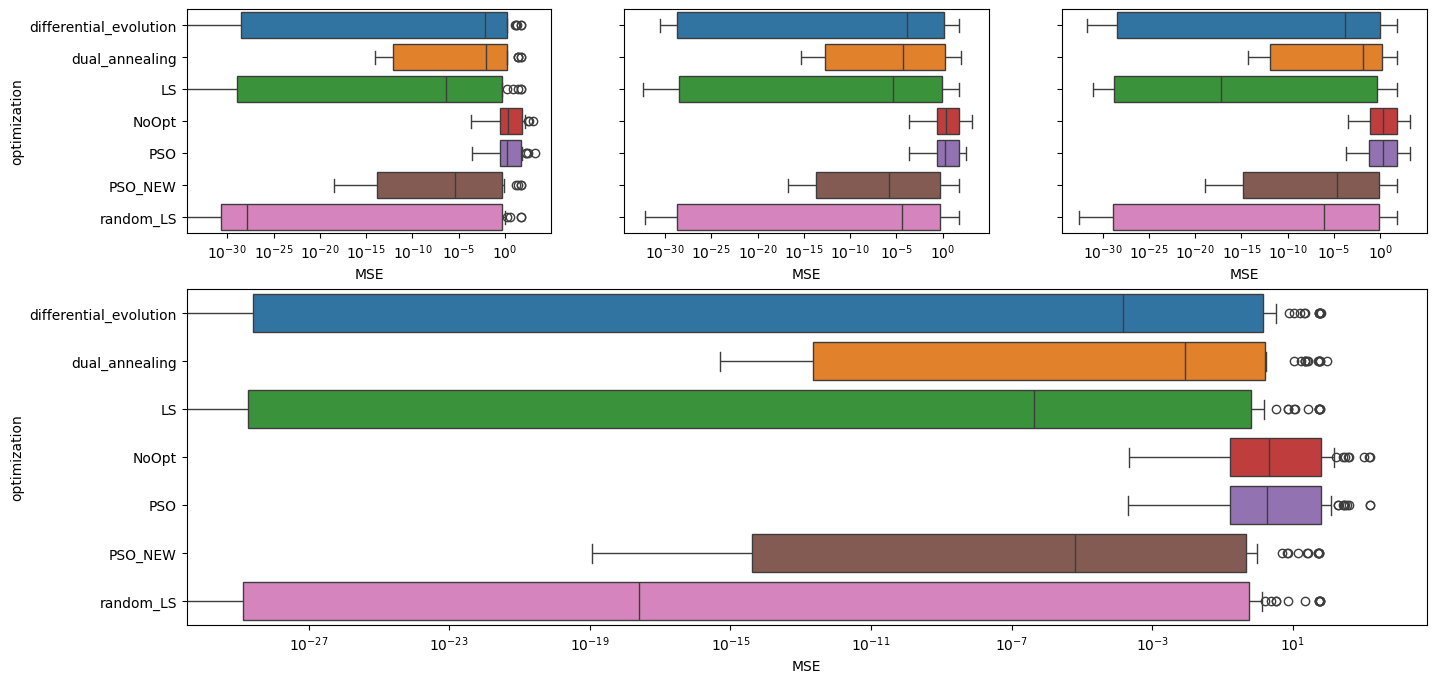

In [13]:
fig = plt.figure(figsize=(16, 8))
gs = mpl.gridspec.GridSpec(2, 3, height_ratios=[1, 1.5])

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1], sharex=ax1)
ax3 = fig.add_subplot(gs[0,2], sharex=ax2)
ax4 = fig.add_subplot(gs[1, :])

axs = [ax1, ax2, ax3, ax4]
ted_datas = [ted_data1, ted_data2, ted_data3]

for i in range(3):
    sns.boxplot(ted_datas[i], x="MSE", y="optimization", hue="optimization", ax=axs[i])
    # axs[i].set_xlim(0, 10)
    axs[i].set_xscale("log")

    if i>0:
        axs[i].set_yticklabels("")
        axs[i].set_ylabel("")

sns.boxplot(ted_data, x="MSE", y="optimization", hue="optimization", ax=axs[3])
axs[3].set_xscale("log")

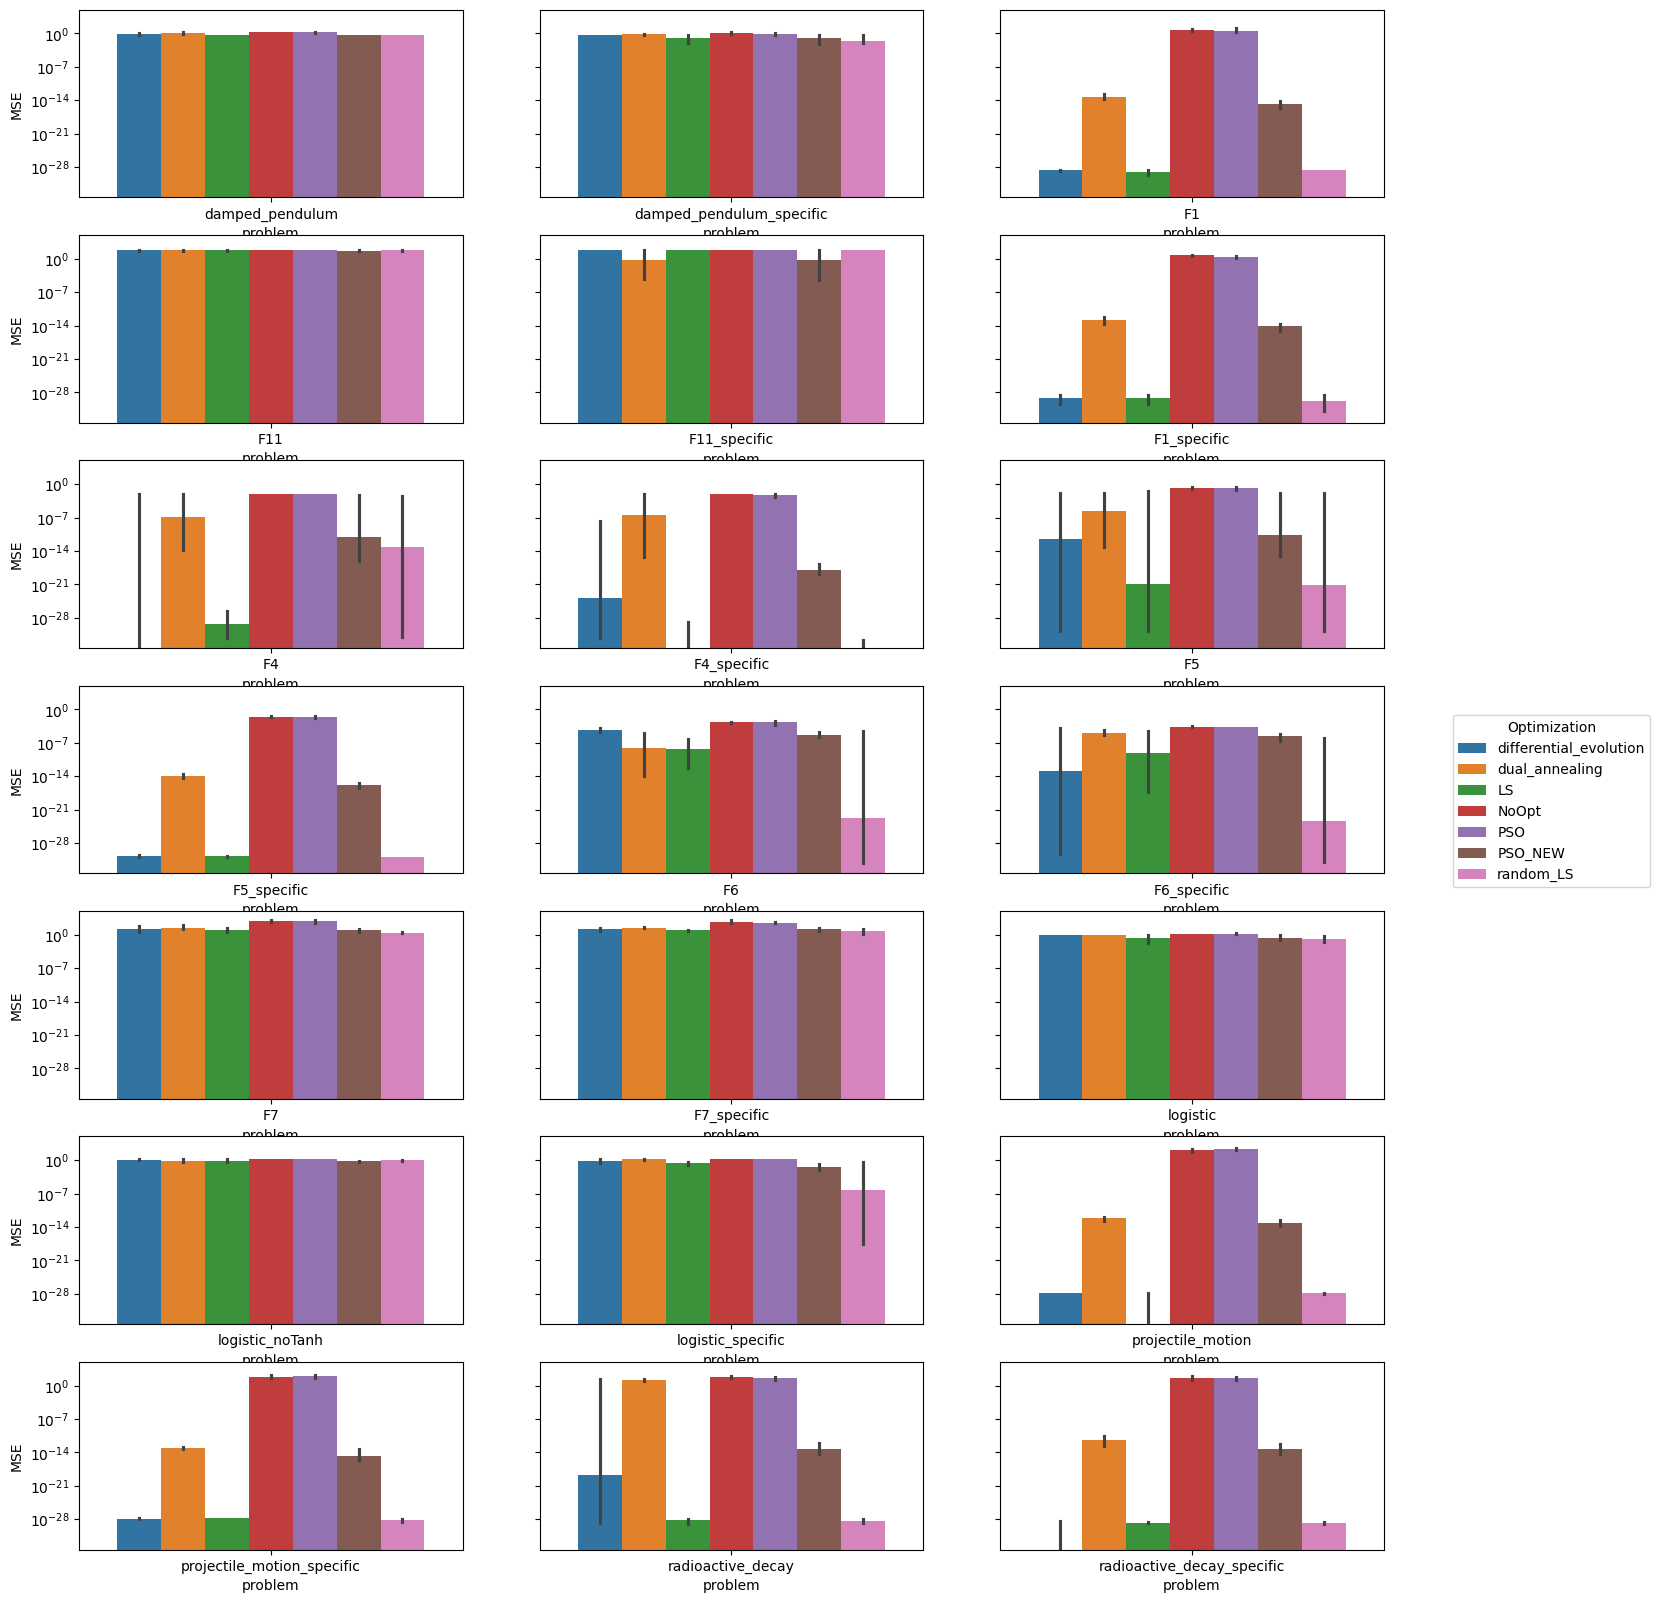

In [14]:
fig, axs = plt.subplots(7, 3, figsize=(18, 20), sharey=True)
axs = axs.flatten()

for ax, problem in zip(axs, problems):
    filt_data = ted_data[ted_data["problem"] == problem]
    sns.barplot(data=filt_data, x="problem", y="MSE", hue="optimization", ax=ax)
    ax.get_legend().remove()
    ax.set_yscale("log")

# Get the handles and labels from the last plot for the legend
handles, labels = axs[-1].get_legend_handles_labels()

# Add the legend to the figure, positioned on the right
fig.legend(handles, labels, loc='center right', title='Optimization')

# Adjust layout to make space for the legend
plt.subplots_adjust(right=0.85)

plt.show()

## TED

<Axes: xlabel='TED', ylabel='optimization'>

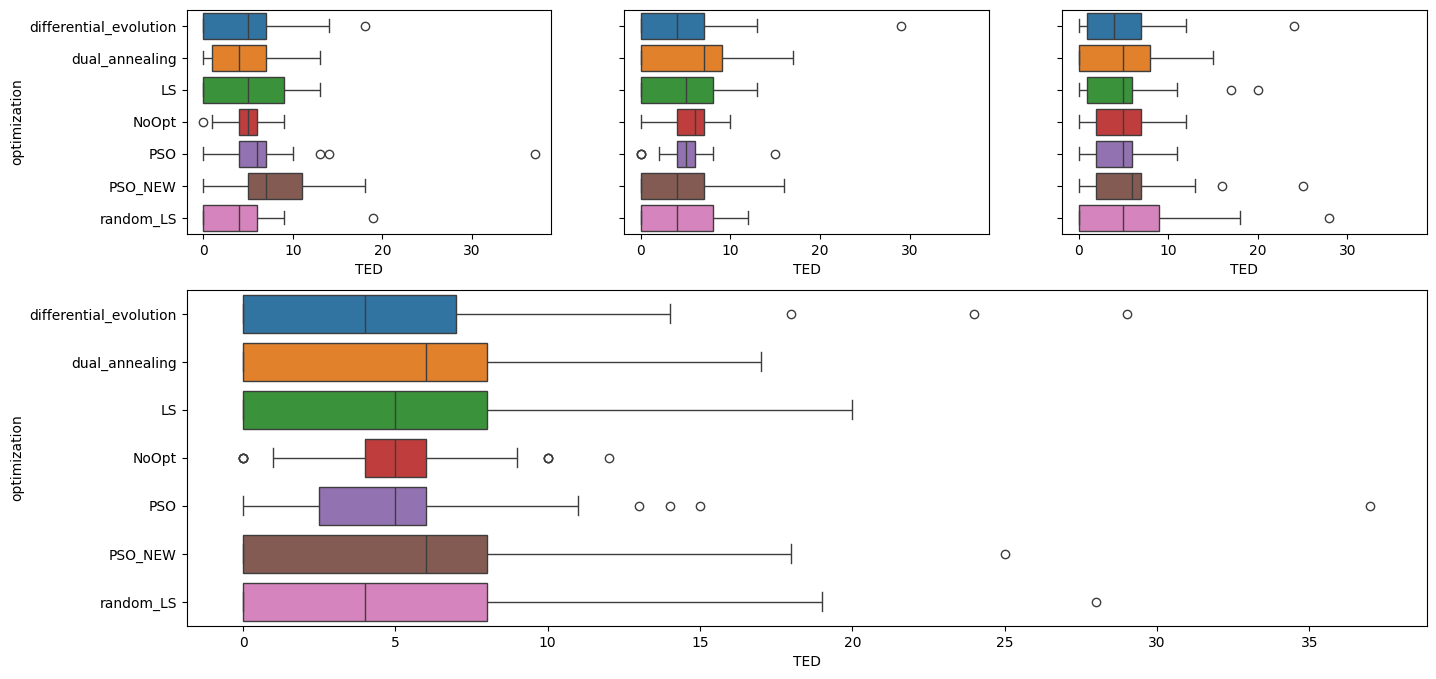

In [15]:
fig = plt.figure(figsize=(16, 8))
gs = mpl.gridspec.GridSpec(2, 3, height_ratios=[1, 1.5])

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1], sharex=ax1)
ax3 = fig.add_subplot(gs[0,2], sharex=ax2)
ax4 = fig.add_subplot(gs[1, :])

axs = [ax1, ax2, ax3, ax4]
ted_datas = [ted_data1, ted_data2, ted_data3]

for i in range(3):
    sns.boxplot(ted_datas[i], x="TED", y="optimization", hue="optimization", ax=axs[i])
    if i>0:
        axs[i].set_yticklabels("")
        axs[i].set_ylabel("")

sns.boxplot(ted_data, x="TED", y="optimization", hue="optimization", ax=axs[3])

<Axes: xlabel='TED', ylabel='optimization'>

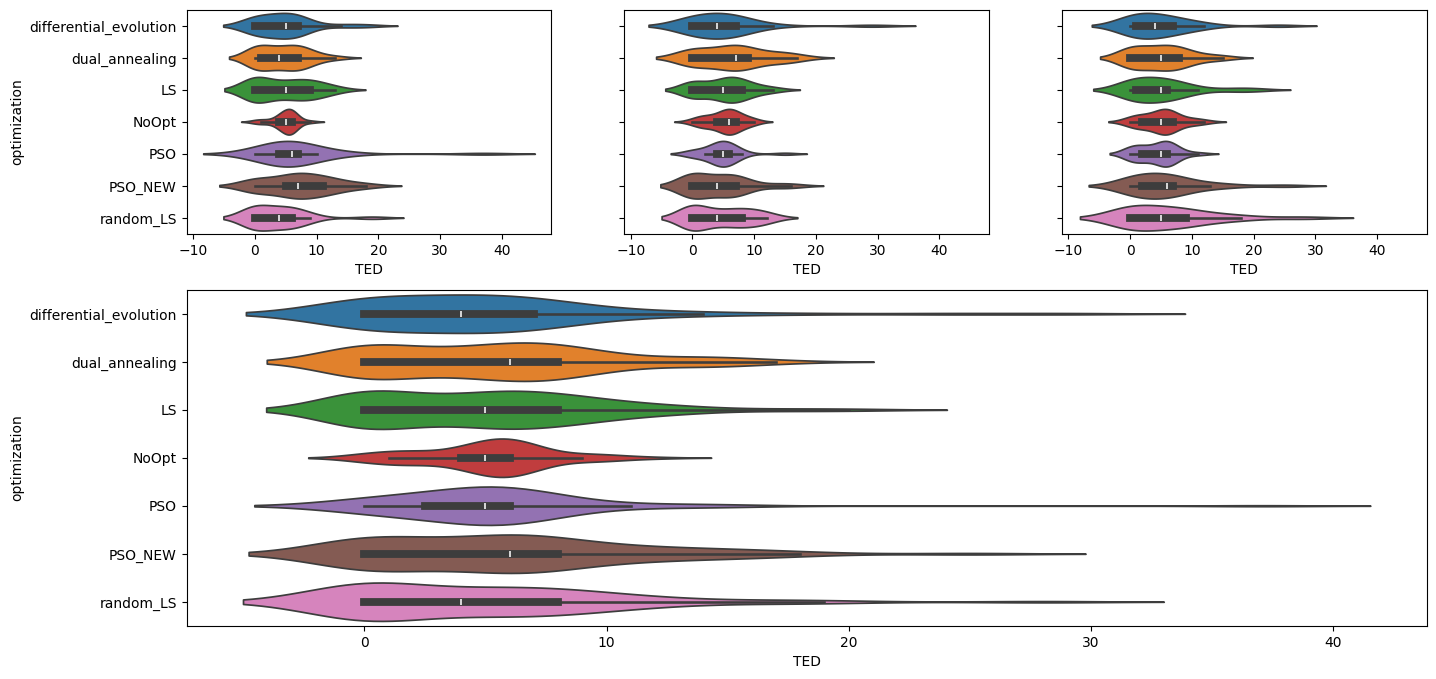

In [16]:
fig = plt.figure(figsize=(16, 8))
gs = mpl.gridspec.GridSpec(2, 3, height_ratios=[1, 1.5])

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1], sharex=ax1)
ax3 = fig.add_subplot(gs[0,2], sharex=ax2)
ax4 = fig.add_subplot(gs[1, :])

axs = [ax1, ax2, ax3, ax4]
ted_datas = [ted_data1, ted_data2, ted_data3]

for i in range(3):
    sns.violinplot(ted_datas[i], x="TED", y="optimization", hue="optimization", ax=axs[i])
    if i>0:
        axs[i].set_yticklabels("")
        axs[i].set_ylabel("")

sns.violinplot(ted_data, x="TED", y="optimization", hue="optimization", ax=axs[3])

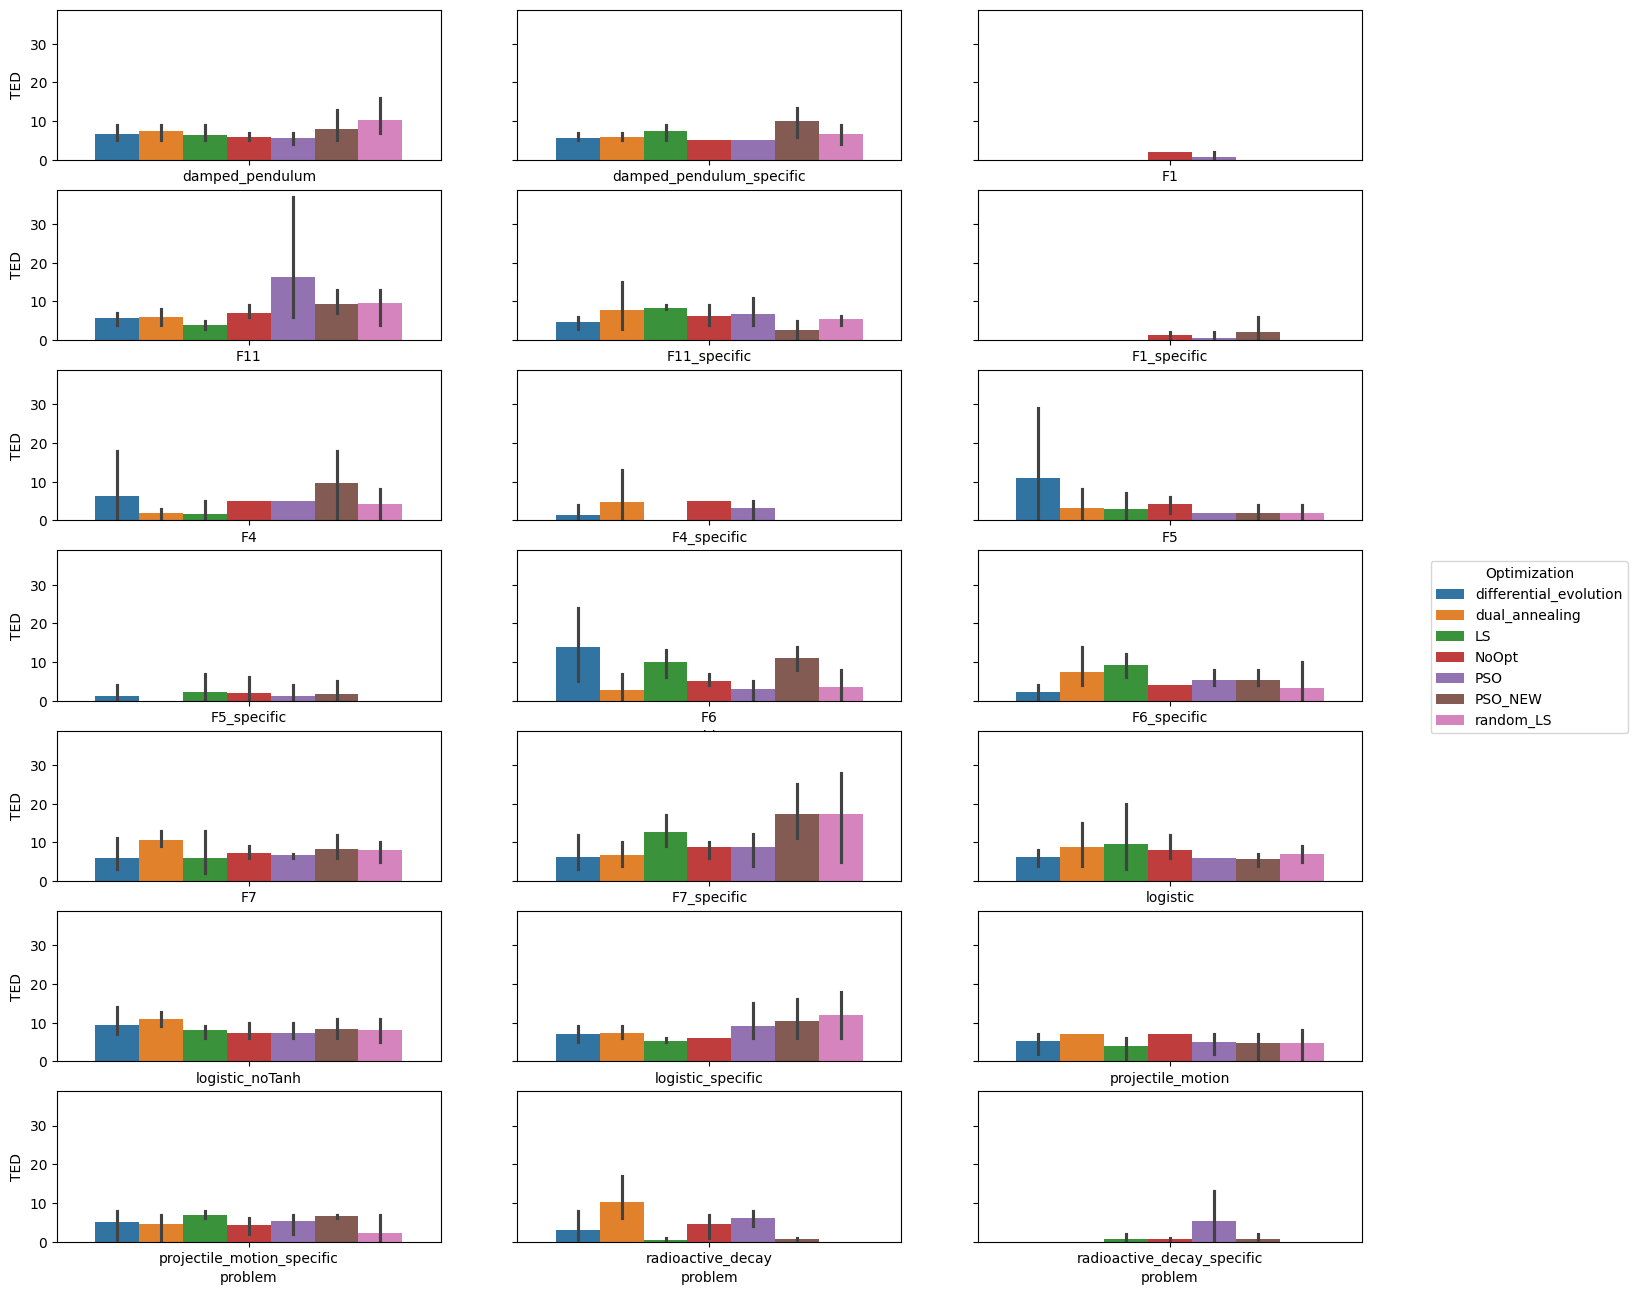

In [17]:
fig, axs = plt.subplots(7, 3, figsize=(18, 16), sharey=True)
axs = axs.flatten()

for ax, problem in zip(axs, problems):
    filt_data = ted_data[ted_data["problem"] == problem]
    sns.barplot(data=filt_data, x="problem", y="TED", hue="optimization", ax=ax)
    ax.get_legend().remove()

# Get the handles and labels from the last plot for the legend
handles, labels = axs[-1].get_legend_handles_labels()

# Add the legend to the figure, positioned on the right
fig.legend(handles, labels, loc='center right', title='Optimization')

# Adjust layout to make space for the legend
plt.subplots_adjust(right=0.85)

plt.show()



In [18]:
table = np.zeros((2,2))
table

array([[0., 0.],
       [0., 0.]])

In [19]:
def TED_MSE_table(optimization, ted_threshold=3, MSE_threshold=1e-6):
    values = optimization[["TED", "MSE"]]

    table = np.zeros((2,2))
    correct = 0

    for index, row in values.iterrows():
        if row.TED <= ted_threshold and row.MSE <= MSE_threshold:
            table[0,0] += 1
        elif row.TED <= ted_threshold and row.MSE >= MSE_threshold:
            table[0,1] += 1
        elif row.TED >= ted_threshold and row.MSE <= MSE_threshold:
            table[1,0] += 1
        elif row.TED >= ted_threshold and row.MSE >= MSE_threshold:
            table[1,1] += 1

        if row.TED == 0:
            correct += 1

    table = pd.DataFrame(table, columns=["Positive", "Negative"], index=["Positive", "Negative"])

    total_TP = table.iloc[0,0] if table.iloc[0,0] > 0 else np.inf

    return table, correct / total_TP

In [20]:
def accuracy(optimization):
    values = optimization[["TED", "MSE"]]

    correct = 0

    for index, row in values.iterrows():
        if row.TED == 0:
            correct += 1

    total = len(values)

    return correct / total


def score(optimization, TED_threshold):
    table = TED_MSE_table(optimization, ted_threshold=TED_threshold)
    
    values = optimization[["TED", "MSE"]]

    correct = 0

    for index, row in values.iterrows():
        if row.TED == 0:
            correct += 1

    total_TP = table.iloc[0,0] if table.iloc[0,0] > 0 else 0.1
    return correct / total_TP


In [21]:
def info_table(data, TED_threshold=3):
    opts = data["optimization"].unique()

    info = {}

    for opt in opts:
        opt_data = data[data["optimization"] == opt]
        table, score = TED_MSE_table(opt_data, TED_threshold)
        acc = accuracy(opt_data)

        info[opt] = [table.iloc[0,0], score * table.iloc[0,0], score, acc]
    
    df = pd.DataFrame(info).T
    df.columns = ["Positive", "N-Perfect", "Perfect Score", "Accuracy"]
    return df


In [22]:
def plot_multiple_confusion_matrix(data, TED_treshold=[3], MSE_threshold=[1e-9]):
    fig, axs = plt.subplots(3, 3, figsize=(20, 14), constrained_layout=True)

    opts = ted_data["optimization"].unique()
    for ax, opt in zip(axs.flatten(), opts):

        sum_table, _ = TED_MSE_table(data[data["optimization"] == "LS"])
        for i,j in itertools.product([0,1], [0,1]):
            sum_table.iloc[i,j] = 0
            
        combinations = list(itertools.product(TED_treshold, MSE_threshold))

        for ted, mse in combinations:
            table, score = TED_MSE_table(data[data["optimization"] == opt], ted, mse)
            sum_table += table

        table = sum_table/len(combinations)

        sns.heatmap(table, annot=True, ax=ax, cmap="rocket")
        ax.set_title(opt)

    plt.suptitle(f"'Confusion Matrix' - TED ({TED_treshold}) X MSE ({MSE_threshold})", fontsize=20)
    plt.show()

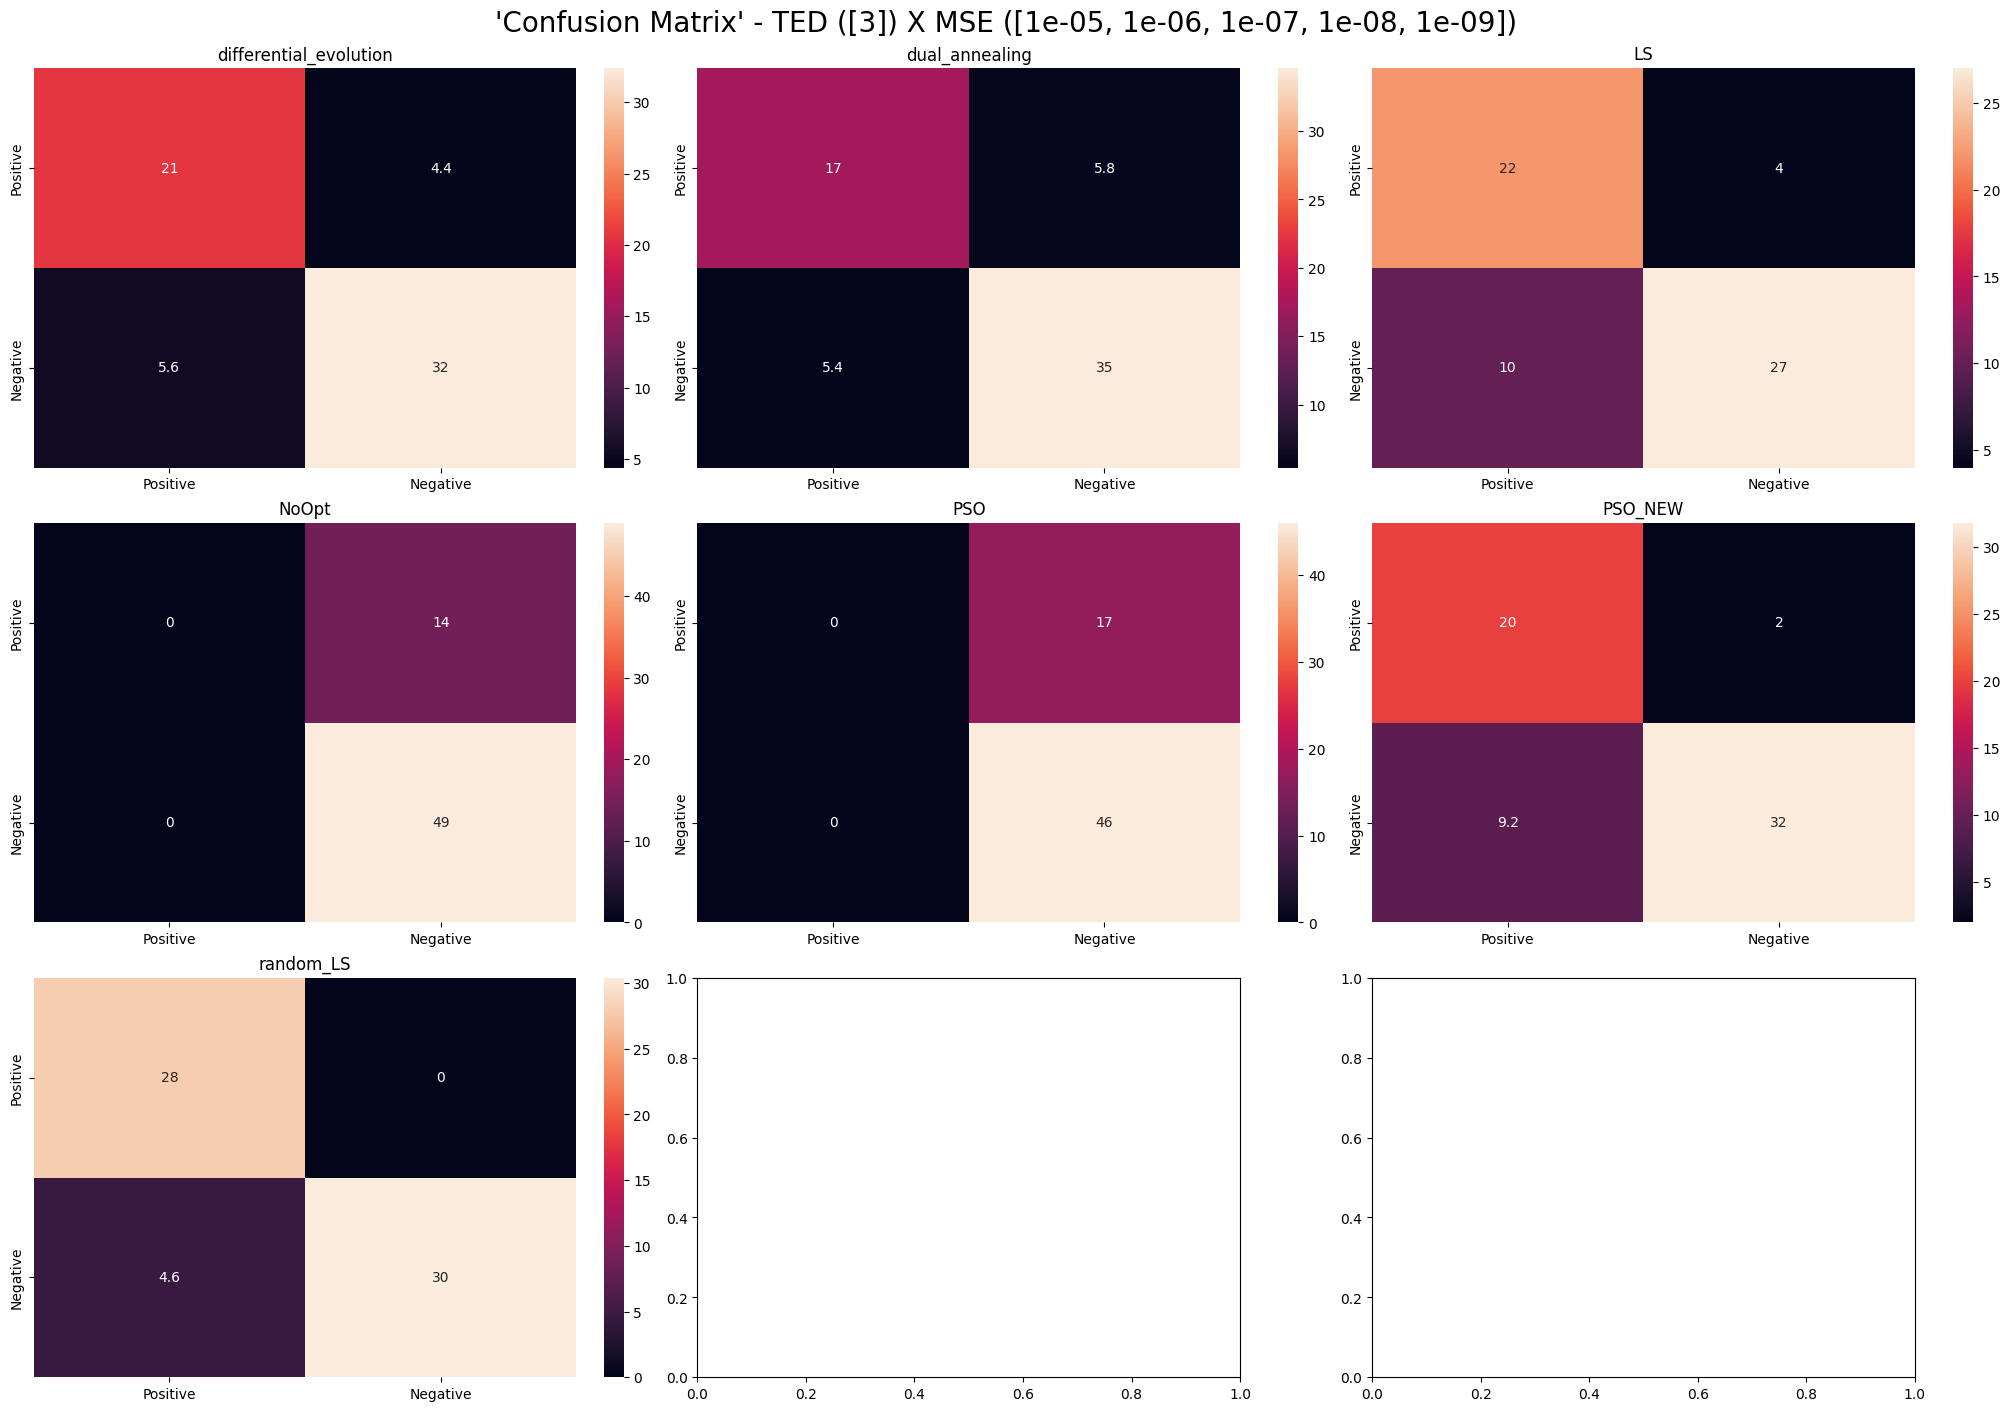

In [23]:
plot_multiple_confusion_matrix(ted_data, TED_treshold=[3], MSE_threshold=[1e-5, 1e-6, 1e-7, 1e-8, 1e-9])

# Scatter Plot

In [24]:
color_map = sns.color_palette("icefire", 7)

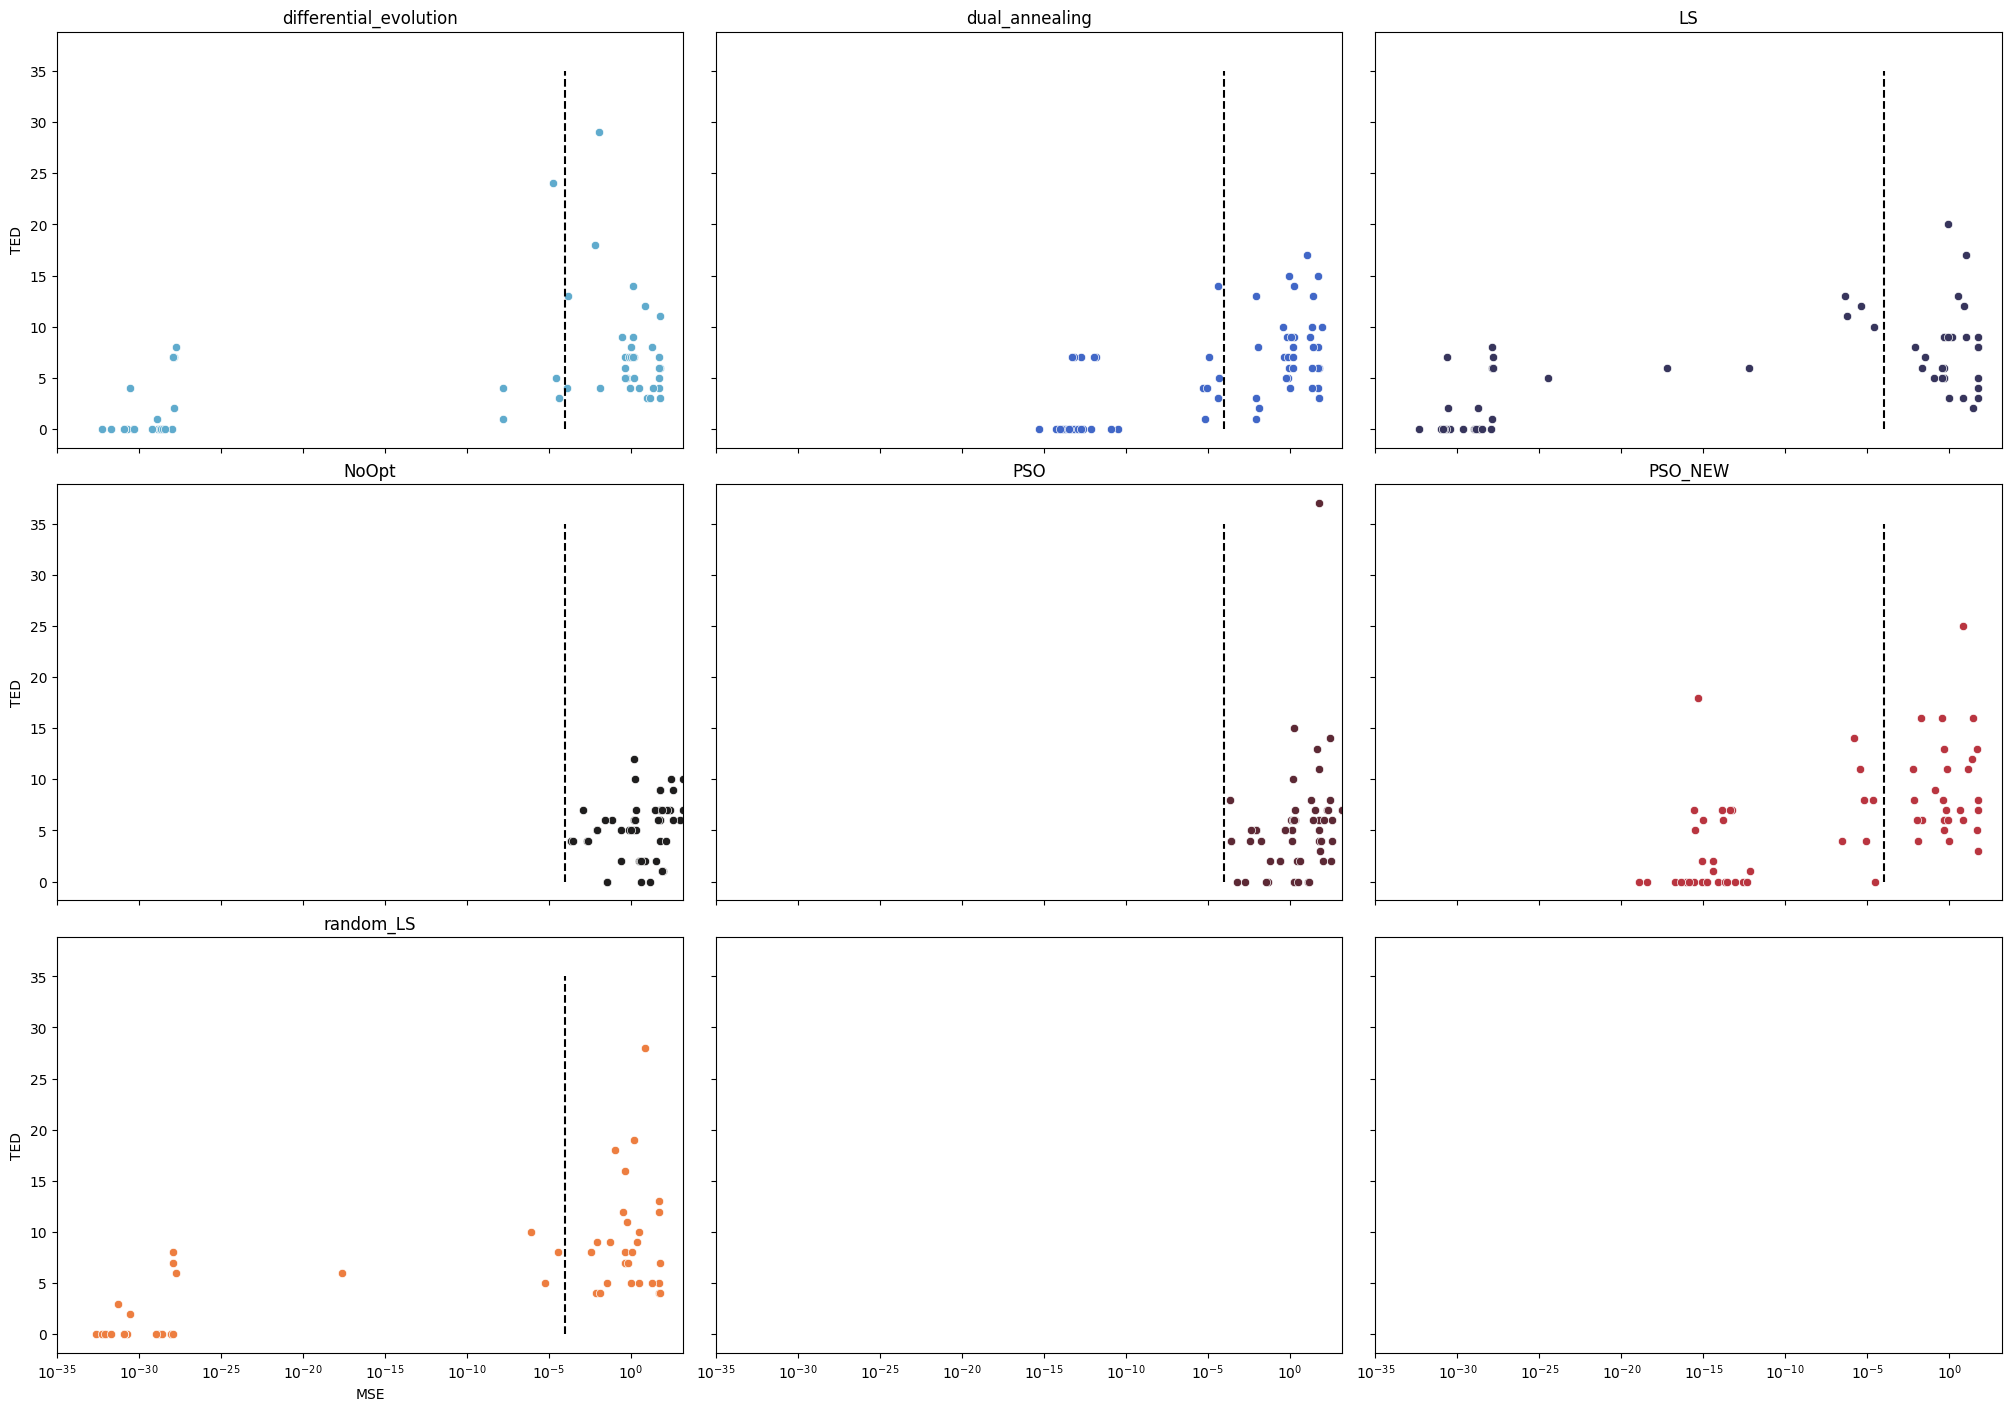

In [25]:
fig, axs = plt.subplots(3, 3, figsize=(20, 14), constrained_layout=True, sharey=True, sharex=True)

opts = list(ted_data["optimization"].unique())
scores = {}
n_true = {}

c=0 

for ax, opt in zip(axs.flatten(), opts):
    filt_data = ted_data[ted_data["optimization"] == opt]

    ax.set_xscale("log")
    sns.scatterplot(data=filt_data, x="MSE", y="TED", color=color_map[c], ax=ax)
    ax.vlines(1e-4, 0, 35, color="black", linestyle="--")
    
    xmin, xmax = 1e-35, 1591.38

    ax.set_title(opt)
    
    ax.set_xlim(xmin, xmax)
    c = (c+1)%7


# plt.suptitle("'Confusion Matrix' - TED X MSE", fontsize=20)
plt.show()

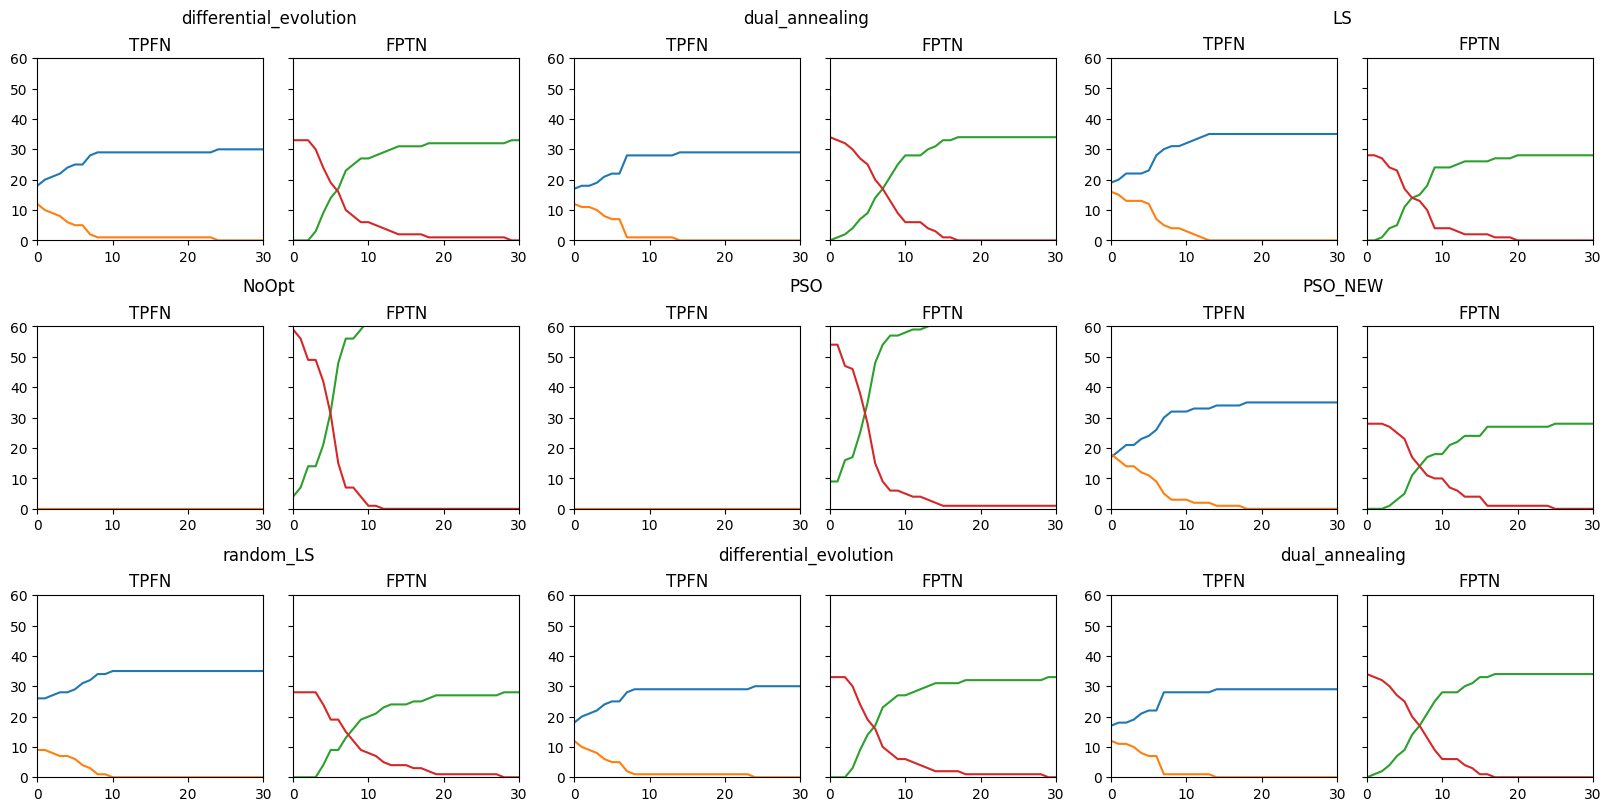

In [26]:
# fig, axs = plt.subplots(3, 3, figsize=(20, 14), constrained_layout=True, sharex=True, sharey=True)
fig = plt.figure(constrained_layout=True, figsize=(16, 8))
subfigs = fig.subfigures(3,3)

MSE_threshold = [1e-4]
TED_treshold = list(range(0, 31))

opts = list(ted_data["optimization"].unique())
# opts.remove("NoOpt")
# opts.remove("PSO")
# for ax, opt in zip(axs.flatten(), opts):
for outerind, subfig in enumerate(subfigs.flat):

    sum_table, _ = TED_MSE_table(ted_data[ted_data["optimization"] == "LS"])
    for i,j in itertools.product([0,1], [0,1]):
        sum_table.iloc[i,j] = 0
        
    combinations = list(itertools.product(TED_treshold, MSE_threshold))

    TP = []
    FP = []
    FN = []
    TN = []

    for ted, mse in combinations:
        table, score = TED_MSE_table(ted_data[ted_data["optimization"] == opts[(outerind)%7]], ted, mse)
        TP.append(table.iloc[0,0])
        FP.append(table.iloc[0,1])
        FN.append(table.iloc[1,0])
        TN.append(table.iloc[1,1])

    axs = subfig.subplots(1, 2, sharex=True, sharey=True)
    subfig.suptitle(opts[(outerind)%7])
    # sns.heatmap(table, annot=True, ax=ax, cmap="rocket")
    sns.lineplot(x=TED_treshold, y=TP, ax=axs[0], c="tab:blue")
    sns.lineplot(x=TED_treshold, y=FN, ax=axs[0], c="tab:orange") 
    sns.lineplot(x=TED_treshold, y=FP, ax=axs[1], c="tab:green") 
    sns.lineplot(x=TED_treshold, y=TN, ax=axs[1], c="tab:red") 
    # ax.set_title(opt)

    # for ax in axs.flat:
    #     ax.set_xticks([])
    #     ax.set_yticks([])

    titles = ["TP" + "FN", "FP" + "TN"]
    for c, ax in enumerate(axs.flatten()):
        ax.set_xlim(0, 30)
        ax.set_ylim(0, 60)
        ax.set_title(titles[c])

# plt.suptitle(f"'Confusion Matrix' - TED ({TED_treshold}) X MSE ({MSE_threshold})", fontsize=20)
plt.show()